# <font color = lightcoral>Prepare Additional Data
>    
#### <font color = red> Source_Master_Appendix with event shortlist concatanted with template description

**20240715_flask_app_model_change_v1.00.py**

> FYI only --> Note the change in transformer model (for higher precision)
>

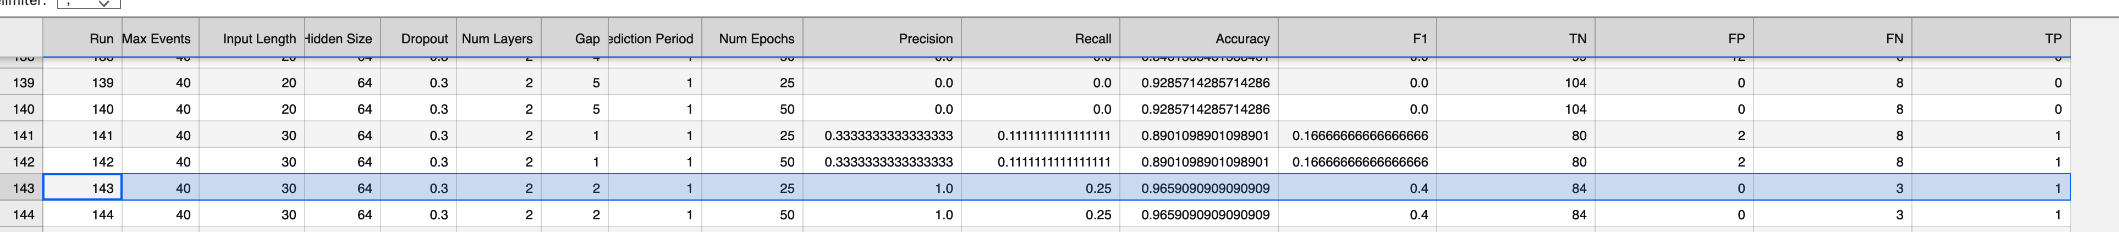

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")

Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 5 Key Files

In [2]:
import pandas as pd
import numpy as np
import time

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

################################## Part 1: Parsed Raw File ###################################

print("\n" + "*"*100)
print("********************** Part 1: Parsed Raw File ******************************************")
print("*"*100 + "\n")

parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
parsed_file_df = pd.read_csv(parsed_file)
display(parsed_file_df.head())
print("Shape of Parsed Raw File:", parsed_file_df.shape)

######################### Part 2: Encoded File with Feature for Model Training ######################

print("\n" + "*"*100)
print("********************** Part 2: Input Data with Features ******************************************")
print("*"*100 + "\n")

encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_mapping_master_FINAL.parquet"
encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
display(encoded_feature_input_file_df.iloc[:, :25].head())
print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

######################### Part 3: Encoded File where Train_Test = Test HEAD ###############################

print("\n" + "*"*100)
print("********************** Part 3: Test Set - HEAD *******************************")
print("*"*100 + "\n")

encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
display(encoded_feature_input_test_df.iloc[:, :25].head(10))
print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


######################### Part 4: Encoded File where Train_Test = Test MIDDLE ###############################

# Part 4: Encoded File where Train_Test = Test (Records 100-200)
print("\n" + "*"*100)
print("********************** Part 4: Test Set - Records 100-200 *******************************")
print("*"*100 + "\n")


encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
display(encoded_feature_input_test_df.iloc[100:110, :25])
print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)

######################### Part 5: Encoded File where Train_Test = Test TAIL ###############################

print("\n" + "*"*100)
print("********************** Part 5: Test Set - TAIL *******************************")
print("*"*100 + "\n")

encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
display(encoded_feature_input_test_df.iloc[:, :25].tail(10))
print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


######################### Part 6: Event_ID to Template Mapping #######################################

print("\n" + "*"*100)
print("********************** Part 6: Event_ID to Template Mapping ******************************************")
print("*"*100 + "\n")

eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
eventid_template_df = pd.read_csv(eventid_template_file)
display(eventid_template_df.head())
print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

######################### Part 7: Event_ID to Encoding Mapping #######################################

print("\n" + "*"*100)
print("********************** Part 7: Event_ID to Encoding Mapping ******************************************")
print("*"*100 + "\n")

eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
eventid_encoding_df = pd.read_csv(eventid_encoding_file)
display(eventid_encoding_df.head())
print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

######################### Part 8: First Two Records from X_test and y_test #######################

print("\n" + "*"*100)
print("********************** Part 8: First Two Records from X_test and y_test *****************************")
print("*"*100 + "\n")

file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Convert the first two records to DataFrames for better display
X_test_first_two = pd.DataFrame(X_test[:2].reshape(-1, X_test.shape[2]))
y_test_first_two = pd.DataFrame(y_test[:2], columns=['Actual'])

# Display the first two records
print("First two records from X_test:")
display(X_test_first_two)

print("\nFirst two records from y_test:")
display(y_test_first_two)


****************************************************************************************************
********************** Part 1: Parsed Raw File ******************************************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected


Shape of Parsed Raw File: (4713493, 13)

****************************************************************************************************
********************** Part 2: Input Data with Features ******************************************
****************************************************************************************************



,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2,EventId_3,EventId_4,EventId_5
0,0,Train,2005-06-03 16:00:00,0,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,228,228,228,228,228
1,1,Train,2005-06-03 16:05:00,1,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,729,987,987,987,987
2,2,Train,2005-06-03 16:10:00,2,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,734,430,504,95,95
3,3,Train,2005-06-03 16:15:00,3,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,987,987,987,987,328
4,4,Train,2005-06-03 16:25:00,5,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,95,504,504,399,399


Shape of Encoded File with Features: (14537, 35453)

****************************************************************************************************
********************** Part 3: Test Set - HEAD *******************************
****************************************************************************************************



,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2,EventId_3,EventId_4,EventId_5
11615,11615,Test,2005-11-08 16:10:00,45506,0,1,68,0,0.000000,16,1,1,35433,8.0,0.000000,0,0.000000,0.000000,26.0,10.0,68,0,0,0,0
11616,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.600000,1,0.000000,1.251989,33.0,13.0,95,399,399,95,95
11617,11617,Test,2005-11-08 16:55:00,45515,0,1,176,0,0.000000,16,1,1,35433,15.0,0.000000,0,1.251989,-1.251989,26.0,13.0,176,0,0,0,0
11618,11618,Test,2005-11-08 17:25:00,45521,1,2,74,1,0.693147,17,1,1024,35433,1.0,0.000977,0,0.000000,0.693147,1049.0,14.0,74,74,74,74,74
11619,11619,Test,2005-11-08 17:30:00,45522,0,1,176,0,0.000000,17,1,1,35433,1024.0,0.000000,0,0.693147,-0.693147,1042.0,14.0,176,0,0,0,0
11620,11620,Test,2005-11-08 17:45:00,45525,0,1,68,0,0.000000,17,1,1,35433,1.0,0.000000,0,0.000000,0.000000,1042.0,14.0,68,0,0,0,0
11621,11621,Test,2005-11-08 18:25:00,45533,0,3,95,2,1.098612,18,1,3,35433,1.0,0.666667,1,0.000000,1.098612,1030.0,13.0,95,399,80,0,0
11622,11622,Test,2005-11-08 18:35:00,45535,0,1,68,0,0.000000,18,1,2,35433,3.0,0.000000,0,1.098612,-1.098612,1031.0,13.0,68,68,0,0,0
11623,11623,Test,2005-11-08 18:40:00,45536,0,1,228,0,0.000000,18,1,1,35433,2.0,0.000000,0,0.000000,0.000000,8.0,12.0,228,0,0,0,0
11624,11624,Test,2005-11-08 18:50:00,45538,0,2,68,1,0.500402,18,1,10,35433,1.0,0.100000,0,0.000000,0.500402,17.0,13.0,504,504,68,68,68


Shape of Encoded File where Train_Test = Test: (2922, 35453)

****************************************************************************************************
********************** Part 4: Test Set - Records 100-200 *******************************
****************************************************************************************************



,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2,EventId_3,EventId_4,EventId_5
11715,11715,Test,2005-11-10 09:40:00,46004,0,1,976,0,0.000000,9,3,1,35433,1.0,0.000000,0,0.000000,0.000000,91.0,20.0,976,0,0,0,0
11716,11716,Test,2005-11-10 10:25:00,46013,0,2,231,1,0.693147,10,3,2,35433,1.0,0.500000,0,0.000000,0.693147,16.0,17.0,231,976,0,0,0
11717,11717,Test,2005-11-10 11:55:00,46031,0,1,976,0,0.000000,11,3,1,35433,2.0,0.000000,0,0.693147,-0.693147,6.0,11.0,976,0,0,0,0
11718,11718,Test,2005-11-10 12:10:00,46034,0,7,399,135,0.675366,12,3,799,35406,1.0,0.168961,0,0.000000,0.675366,804.0,17.0,95,95,95,399,95
11719,11719,Test,2005-11-10 13:00:00,46044,0,3,95,2,1.098612,13,3,3,35433,799.0,0.666667,1,0.675366,0.423247,806.0,19.0,95,399,80,0,0
11720,11720,Test,2005-11-10 13:35:00,46051,0,4,95,3,1.285293,13,3,13,35433,3.0,0.230769,0,1.098612,0.186681,818.0,22.0,95,95,95,95,763
11721,11721,Test,2005-11-10 14:10:00,46058,0,5,95,8,1.526878,14,3,16,35432,13.0,0.500000,0,1.285293,0.241585,832.0,25.0,95,776,95,95,95
11722,11722,Test,2005-11-10 14:40:00,46064,0,5,95,5,1.545423,14,3,12,35432,16.0,0.416667,0,1.526878,0.018545,843.0,29.0,95,95,95,776,399
11723,11723,Test,2005-11-10 15:20:00,46072,0,5,95,7,1.581094,15,3,9,35432,12.0,0.777778,1,1.545423,0.035671,53.0,27.0,95,776,95,763,399
11724,11724,Test,2005-11-10 15:50:00,46078,0,4,763,4,1.377820,15,3,13,35433,9.0,0.307692,0,1.581094,-0.203274,63.0,28.0,95,95,95,763,763


Shape of Encoded File where Train_Test = Test: (2922, 35453)

****************************************************************************************************
********************** Part 5: Test Set - TAIL *******************************
****************************************************************************************************



,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2,EventId_3,EventId_4,EventId_5
14527,14527,Test,2006-01-04 01:10:00,61742,0,2,193,1,0.693147,1,2,2,35433,2.0,0.500000,0,0.693147,0.000000,9.0,14.0,193,556,0,0,0
14528,14528,Test,2006-01-04 01:15:00,61743,0,6,812,7,1.529248,1,2,15,35431,2.0,0.466667,0,0.693147,0.836101,23.0,19.0,258,156,156,812,812
14529,14529,Test,2006-01-04 04:45:00,61785,0,1,228,0,0.000000,4,2,1,35433,15.0,0.000000,0,1.529248,-1.529248,22.0,18.0,228,0,0,0,0
14530,14530,Test,2006-01-04 07:25:00,61817,0,3,647,13,1.058508,7,2,32,35433,1.0,0.406250,0,0.000000,1.058508,52.0,19.0,647,647,812,812,812
14531,14531,Test,2006-01-04 07:30:00,61818,0,2,193,3,0.693147,7,2,4,35433,32.0,0.750000,1,1.058508,-0.365360,54.0,19.0,193,556,193,556,0
14532,14532,Test,2006-01-04 07:35:00,61819,0,1,606,0,0.000000,7,2,1,35433,4.0,0.000000,0,0.693147,-0.693147,53.0,18.0,606,0,0,0,0
14533,14533,Test,2006-01-04 07:40:00,61820,0,6,156,5,1.609438,7,2,10,35431,1.0,0.500000,0,0.000000,1.609438,48.0,18.0,812,647,647,258,193
14534,14534,Test,2006-01-04 07:45:00,61821,0,2,193,1,0.693147,7,2,2,35433,10.0,0.500000,0,1.609438,-0.916291,49.0,19.0,193,556,0,0,0
14535,14535,Test,2006-01-04 07:50:00,61822,0,3,156,2,1.039721,7,2,4,35433,2.0,0.500000,0,0.693147,0.346574,21.0,19.0,193,556,156,156,0
14536,14536,Test,2006-01-04 08:00:00,61824,1,1,99,0,0.000000,8,2,8,35433,4.0,0.000000,0,1.039721,-1.039721,25.0,18.0,99,99,99,99,99


Shape of Encoded File where Train_Test = Test: (2922, 35453)

****************************************************************************************************
********************** Part 6: Event_ID to Template Mapping ******************************************
****************************************************************************************************



,EventId,EventTemplate,Occurrences
0,3aa50e45,instruction cache parity error corrected,105924
1,b9250ad9,MidplaneSwitchController performing bit sparing on R<*>-M<*>-L<*>-U<*>-C bit <*>,964
2,fc5f0940,generating core.<*>,1706751
3,1840cbfe,"<*> ddr errors(s) detected and corrected on rank <*>, symbol <*>, bit <*>",33939
4,828a502b,<*> <*> <*> error(s) (dcr <*>) detected and corrected,5040


Shape of Event_ID to Template Mapping: (1000, 3)

****************************************************************************************************
********************** Part 7: Event_ID to Encoding Mapping ******************************************
****************************************************************************************************



,EventId,EncodedValue
0,0025df56,0
1,0045c3a8,1
2,004a68ba,2
3,00980b01,3
4,00d49120,4


Shape of Event_ID to Encoding Mapping: (1000, 2)

****************************************************************************************************
********************** Part 8: First Two Records from X_test and y_test *****************************
****************************************************************************************************

First two records from X_test:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,45510.0,-0.364160,11.0,-0.072711,-0.866508,0.596130,-0.952078,-0.205353,0.051642,-0.200941,-0.854291,-0.577218,-0.866508,1.795035e-18,-0.257510,-0.659998,-2047.870864,862.787984,-534.718270,440.094515,-283.303228,-161.234216,349.471686,29.455197,-136.915977,-212.025750,-60.999929,237.803726,32.777915,21.176680,-114.194870,148.200624,-19.540514,-63.003840,41.384577,80.036103,22.008479,109.725264,-94.333692,37.236123,-19.997967,58.240053,-54.420031,54.705458,-70.859203,-13.074278,1.860684,-7.516986,70.509727,-135.882827,-93.451614,-36.512232,-20.111325,-60.338670,-76.343065,27.656285
1,45514.0,0.104469,80.0,-0.057064,1.006346,0.596130,-0.952078,-0.196450,0.051642,-0.205392,1.022858,1.732448,-0.866508,1.625772e+00,-0.256379,-0.490115,-2048.817332,863.891268,-535.619773,440.995019,-283.801159,-161.953330,351.093142,29.823787,-137.348242,-212.285406,-60.799247,239.860088,34.062508,21.861439,-113.887760,150.439903,-18.753106,-64.995829,42.856527,81.853350,21.908611,111.426033,-99.750063,42.373495,-20.631142,59.781529,-56.650289,53.382343,-71.627494,-14.530250,1.451952,-5.405249,79.218541,-152.468812,-120.039977,-74.278016,-26.132495,-103.639051,-136.116477,16.057502
2,45519.0,-0.364160,41.0,-0.072711,-0.866508,0.596130,-0.952078,-0.205353,0.051642,-0.196489,-0.854291,-0.577218,1.006346,-1.625772e+00,-0.257510,-0.490115,-2043.764103,857.409369,-529.296502,433.276907,-278.787281,-154.618847,333.713196,25.098934,-126.876196,-194.748810,-54.946318,193.178934,23.533150,15.032858,-88.857854,96.529464,-16.293820,-33.666993,20.822308,40.115838,11.166104,44.429169,-28.399684,4.231447,-5.164654,15.161668,-15.972033,6.244275,-16.403934,-8.823143,-5.209376,4.025342,-3.344977,13.722684,2.859107,-85.908346,14.066307,-64.900077,-105.809419,-64.690254
3,45525.0,-0.207950,13.0,-0.070972,0.170372,0.751345,-0.952078,0.445165,0.051642,-0.205392,-0.851236,-0.577218,-0.866508,9.000867e-01,-0.092292,-0.433488,-2048.155512,863.054993,-534.836536,440.025630,-283.205549,-160.991849,348.822534,29.126211,-135.960681,-209.921101,-60.004484,233.327260,32.627742,20.941631,-110.402720,142.812040,-18.402857,-60.521493,39.684404,75.819158,20.292867,101.512429,-89.229645,36.778951,-18.289753,53.133180,-50.735711,46.003461,-63.341987,-13.895835,0.227459,-3.729078,66.649256,-126.881492,-101.314007,-78.767558,-19.278165,-99.175034,-133.799944,1.499291
4,45526.0,-0.364160,41.0,-0.072711,-0.866508,0.751345,-0.952078,-0.205353,0.051642,0.445124,-0.854291,-0.577218,0.170372,-9.000867e-01,-0.093423,-0.433488,-2047.415157,862.256772,-534.284213,439.660938,-283.063484,-160.887976,348.690985,29.277728,-136.707850,-211.900730,-61.096554,236.813625,32.159407,20.846982,-114.342738,147.122452,-19.919636,-62.044734,40.675861,79.161132,22.056564,108.906376,-91.725810,34.762573,-19.693105,57.497861,-53.346202,55.342513,-70.489286,-12.373255,2.057481,-8.533748,66.316595,-127.896983,-80.649810,-18.328707,-17.212243,-39.490339,-47.563274,33.240884
5,45529.0,-0.364160,11.0,-0.072711,-0.866508,0.751345,-0.952078,-0.205353,0.051642,-0.205392,-0.854291,-0.577218,-0.866508,1.795035e-18,-0.093423,-0.433488,-2033.174703,843.167631,-514.244373,415.080078,-265.778112,-138.875240,296.438409,17.372271,-106.050953,-161.486736,-44.157720,116.428149,5.609284,2.951569,-49.139049,21.591154,-12.894200,6.501881,-5.699249,-7.010856,0.276925,-22.218588,43.822881,-34.327005,6.731043,-19.886992,19.994160,-20.600380,21.515890,1.295047,-5.247820,0.814358,-58.427301,119.872937,112.858899,43.421455,36.202966,87.127718,104.175937,-31.276369
6,45537.0,-0.051740,20.0,-0.069234,0.776909,0.906560,-0.952078,-0.204081,0.051642,-0.205392,1.231431,1.732448,-0.866508,1.426604e+00,-0.095361,-0.490115,-208.833676,-1870.454029,2542.758475,-2836.203720,1916.558019,1117.027561,-1934.357737,-49.123821,-178.137637,-603.617787,-398.651854,1139.348120,5.278336,-150.515412,7


First two records from y_test:


,Actual
0,0.0
1,0.0


# <font color = blue> Create consolidated eventID_INT to template mapping table
## <font color = blue> One Time Only

### Step 1: Read the Input Files

In [ ]:
# import pandas as pd
# from datetime import datetime

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

# # Read the event ID to template mapping file
# eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
# eventid_template_df = pd.read_csv(eventid_template_file)

# # Read the event ID to encoded integer mapping file
# eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
# eventid_encoding_df = pd.read_csv(eventid_encoding_file)

### Step 2: Merge the DataFrames

In [ ]:
# # Merge the two dataframes on EventId
# merged_df = pd.merge(eventid_encoding_df, eventid_template_df, on='EventId')

# # Drop the EventId column
# merged_df.drop(columns=['EventId'], inplace=True)

### Step 3: Save the Merged DataFrame

In [ ]:
# # Get the current timestamp for the filename
# timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
# output_file = f"{data_dir}/{timestamp}_event_ID_int_template_mapping.csv"

# # Save the merged dataframe to a CSV file
# merged_df.to_csv(output_file, index=False)

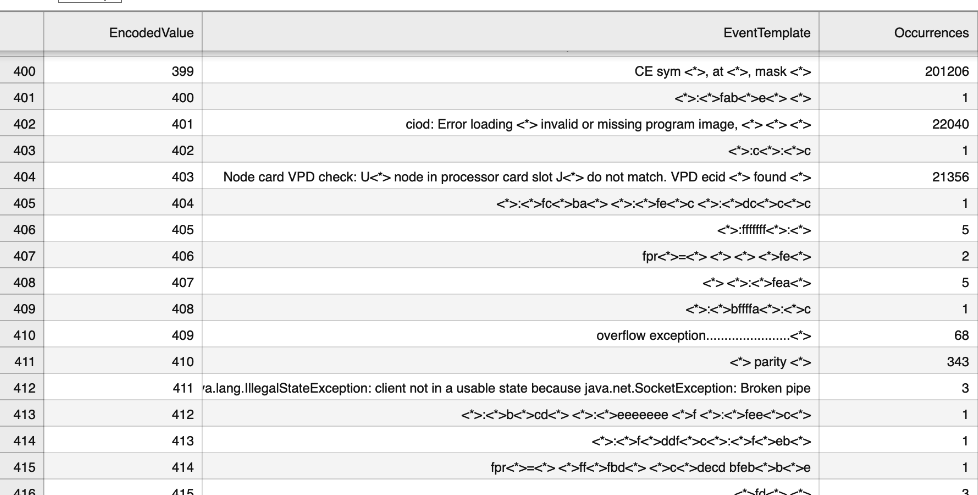

---

# <font color = blue> View the mapping file

In [7]:
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

# Read the event ID to template mapping file
eventid_int_template_mapping_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
eventid_int_template_mapping_df = pd.read_csv(eventid_int_template_mapping_file)
display(eventid_int_template_mapping_df.head(10))
display(eventid_int_template_mapping_df.tail(10))

,EncodedValue,EventTemplate,Occurrences
0,0,<*>:ffff<*>:<*>,1
1,1,"<*> total interrupts. <*> critical input interrupts. <*> microseconds total spent on critical input interrupts, <*> microseconds max time in a critical input interrupt.",135092
2,2,<*>:<*>b<*>cf<*>:ffffffe<*>ce<*>,1
3,3,<*> <*>e <*>,103
4,4,<*> <*>:<*>fefff<*>af<*>d<*>,2
5,5,Ido chip status changed: <*> ip=<*> v=<*> t=<*> status=M <*> <*> <*> <*> <*>,11904
6,6,fpr<*>=<*> <*>ebf<*>e <*> aaecab<*>,1
7,7,<*>fd<*>b<*>:<*>,1
8,8,"While initializing node card, ido with LP of <*> caught java.lang.IllegalStateException: IDo is not in functional state -- currently in state COMMUNICATION_ERROR",9
9,9,regctl scancom interface.........................<*>,47


,EncodedValue,EventTemplate,Occurrences
990,990,<*> <*>:<*>bdd<*>b<*>b<*>,1
991,991,<*> <*>:<*>b<*>dedf<*>d<*>,1
992,992,<*>c <*> <*>,9
993,993,<*> TLB error interrupt,152735
994,994,<*>:<*>fee<*>fea<*> <*>,1
995,995,rts: bad message header: cpu <*> invalid <*> <*> <*> PSR<*> PSR<*> PRXF=<*>a PIXF=<*>,18
996,996,<*>:<*>fd<*> <*>:<*>fee<*>ac<*>,1
997,997,<*>bb<*>a<*>c<*>ec<*>,1
998,998,<*>,856
999,999,fpr<*>=<*> c<*>bc<*> ee<*>caaa <*>ff<*>af<*>,1
